In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import random



#data contains all recipe from https://www.bbc.co.uk/food
recipes = pd.read_json('/Users/svenkerstjens/PycharmProjects/irtm/recipescrape/BBC_recipes.json')

def column_to_columns(data,column):
    '''
    takes a column 'column' from a dataframe 'data' and creates an empty dataframe with a column for
    each distinct word in the column ( data in 'column' is of the form ['a','b','c'] )
    '''
    empty_df = pd.DataFrame(index=range(len(data)))
    for recipe in range(len(data)):
        for ingredient in data[column].iloc[recipe]:
            if ingredient not in empty_df:
                empty_df[ingredient]=0
    return empty_df

def fill_with_ones(empty_df,data,column):
    #Assign a 1 to each ingredient-column if the recipe contains that ingredient
    for j, recipe in enumerate(data.index):
        for ingredient in empty_df.columns:
            if ingredient in data[column].iloc[j]:
                empty_df[ingredient].iloc[j] = 1
                
def num_ingredients(df_column):
    ''' 
    return #ingredients and set of ingredeints
    '''
    ing_set = set()
    for i in df_column:
        for j in i:
            ing_set.add(j)
    print('We currently have', len(ing_set), 'ingredients')
    return len(ing_set), ing_set
            
num_ingredients(recipes['all_ingredients'])


stemmer = nltk.stem.PorterStemmer()

for i, x in enumerate(recipes['all_ingredients']):
    for j, y in enumerate(x):
        recipes['all_ingredients'][i][j]=recipes['all_ingredients'][i][j].lower()
        recipes['all_ingredients'][i][j]=re.sub(r'.*flour','flour'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'pappardelle|penne|tagliatelle|linguine|farfalle|fusilli|orecchiette|spaghetti|rigatoni','pasta'
                                                ,recipes['all_ingredients'][i][j])
        
        recipes['all_ingredients'][i][j]=re.sub(r'.*sugar','sugar'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*oil','oil'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*butter','butter'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*mushroom.*','mushroom'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*tomato.*','tomato'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*stock.*','stock'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*chicken.*','chicken'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*beef.*','beef'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*pork.*','pork'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*potato.*','potato'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*bread$','bread'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*cheese.*','cheese'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*vinegar','vinegar'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*bean.*','bean'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*onion.*','onion'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*duck.*','duck'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*honey.*','honey'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*fish$','fish'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*cream$','cream'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*milk$','milk'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'juice',''
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*noodles?','noodle'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]=re.sub(r'.*rice$','rice'
                                                ,recipes['all_ingredients'][i][j])
        recipes['all_ingredients'][i][j]= stemmer.stem(recipes['all_ingredients'][i][j])
        

binary_ingredients = column_to_columns(recipes,'all_ingredients')
fill_with_ones(binary_ingredients,recipes,'all_ingredients')

num_ingredients(recipes['all_ingredients'])

tfidf_transformer = TfidfTransformer()
tfidf_ingredients = tfidf_transformer.fit_transform(binary_ingredients).toarray()
pca = PCA(n_components=2).fit(tfidf_ingredients)
data2d= pca.transform(tfidf_ingredients)
boollist = ~np.all(tfidf_ingredients == 0, axis=1)
tfidf_ingredients = tfidf_ingredients[boollist]
aggcluster = AgglomerativeClustering(n_clusters=1000,linkage='average',affinity='cosine')
aggclusterlabel = aggcluster.fit_predict(tfidf_ingredients)


randomlist = []
for i in range(0,3):
    n = random.randint(1,1000)
    randomlist.append(n)
    print(randomlist)
    
data2df = pd.DataFrame(data2d)
recipes = pd.concat([recipes,data2df], axis=1)
#subset = recipes[recipes['kmeans'].isin(randomlist)]


We currently have 1328 ingredients
We currently have 847 ingredients
[392]
[392, 562]
[392, 562, 687]


In [2]:
recipes = recipes[boollist]
recipes['aggcluster'] = aggclusterlabel

[833]
[833, 392]
[833, 392, 664]


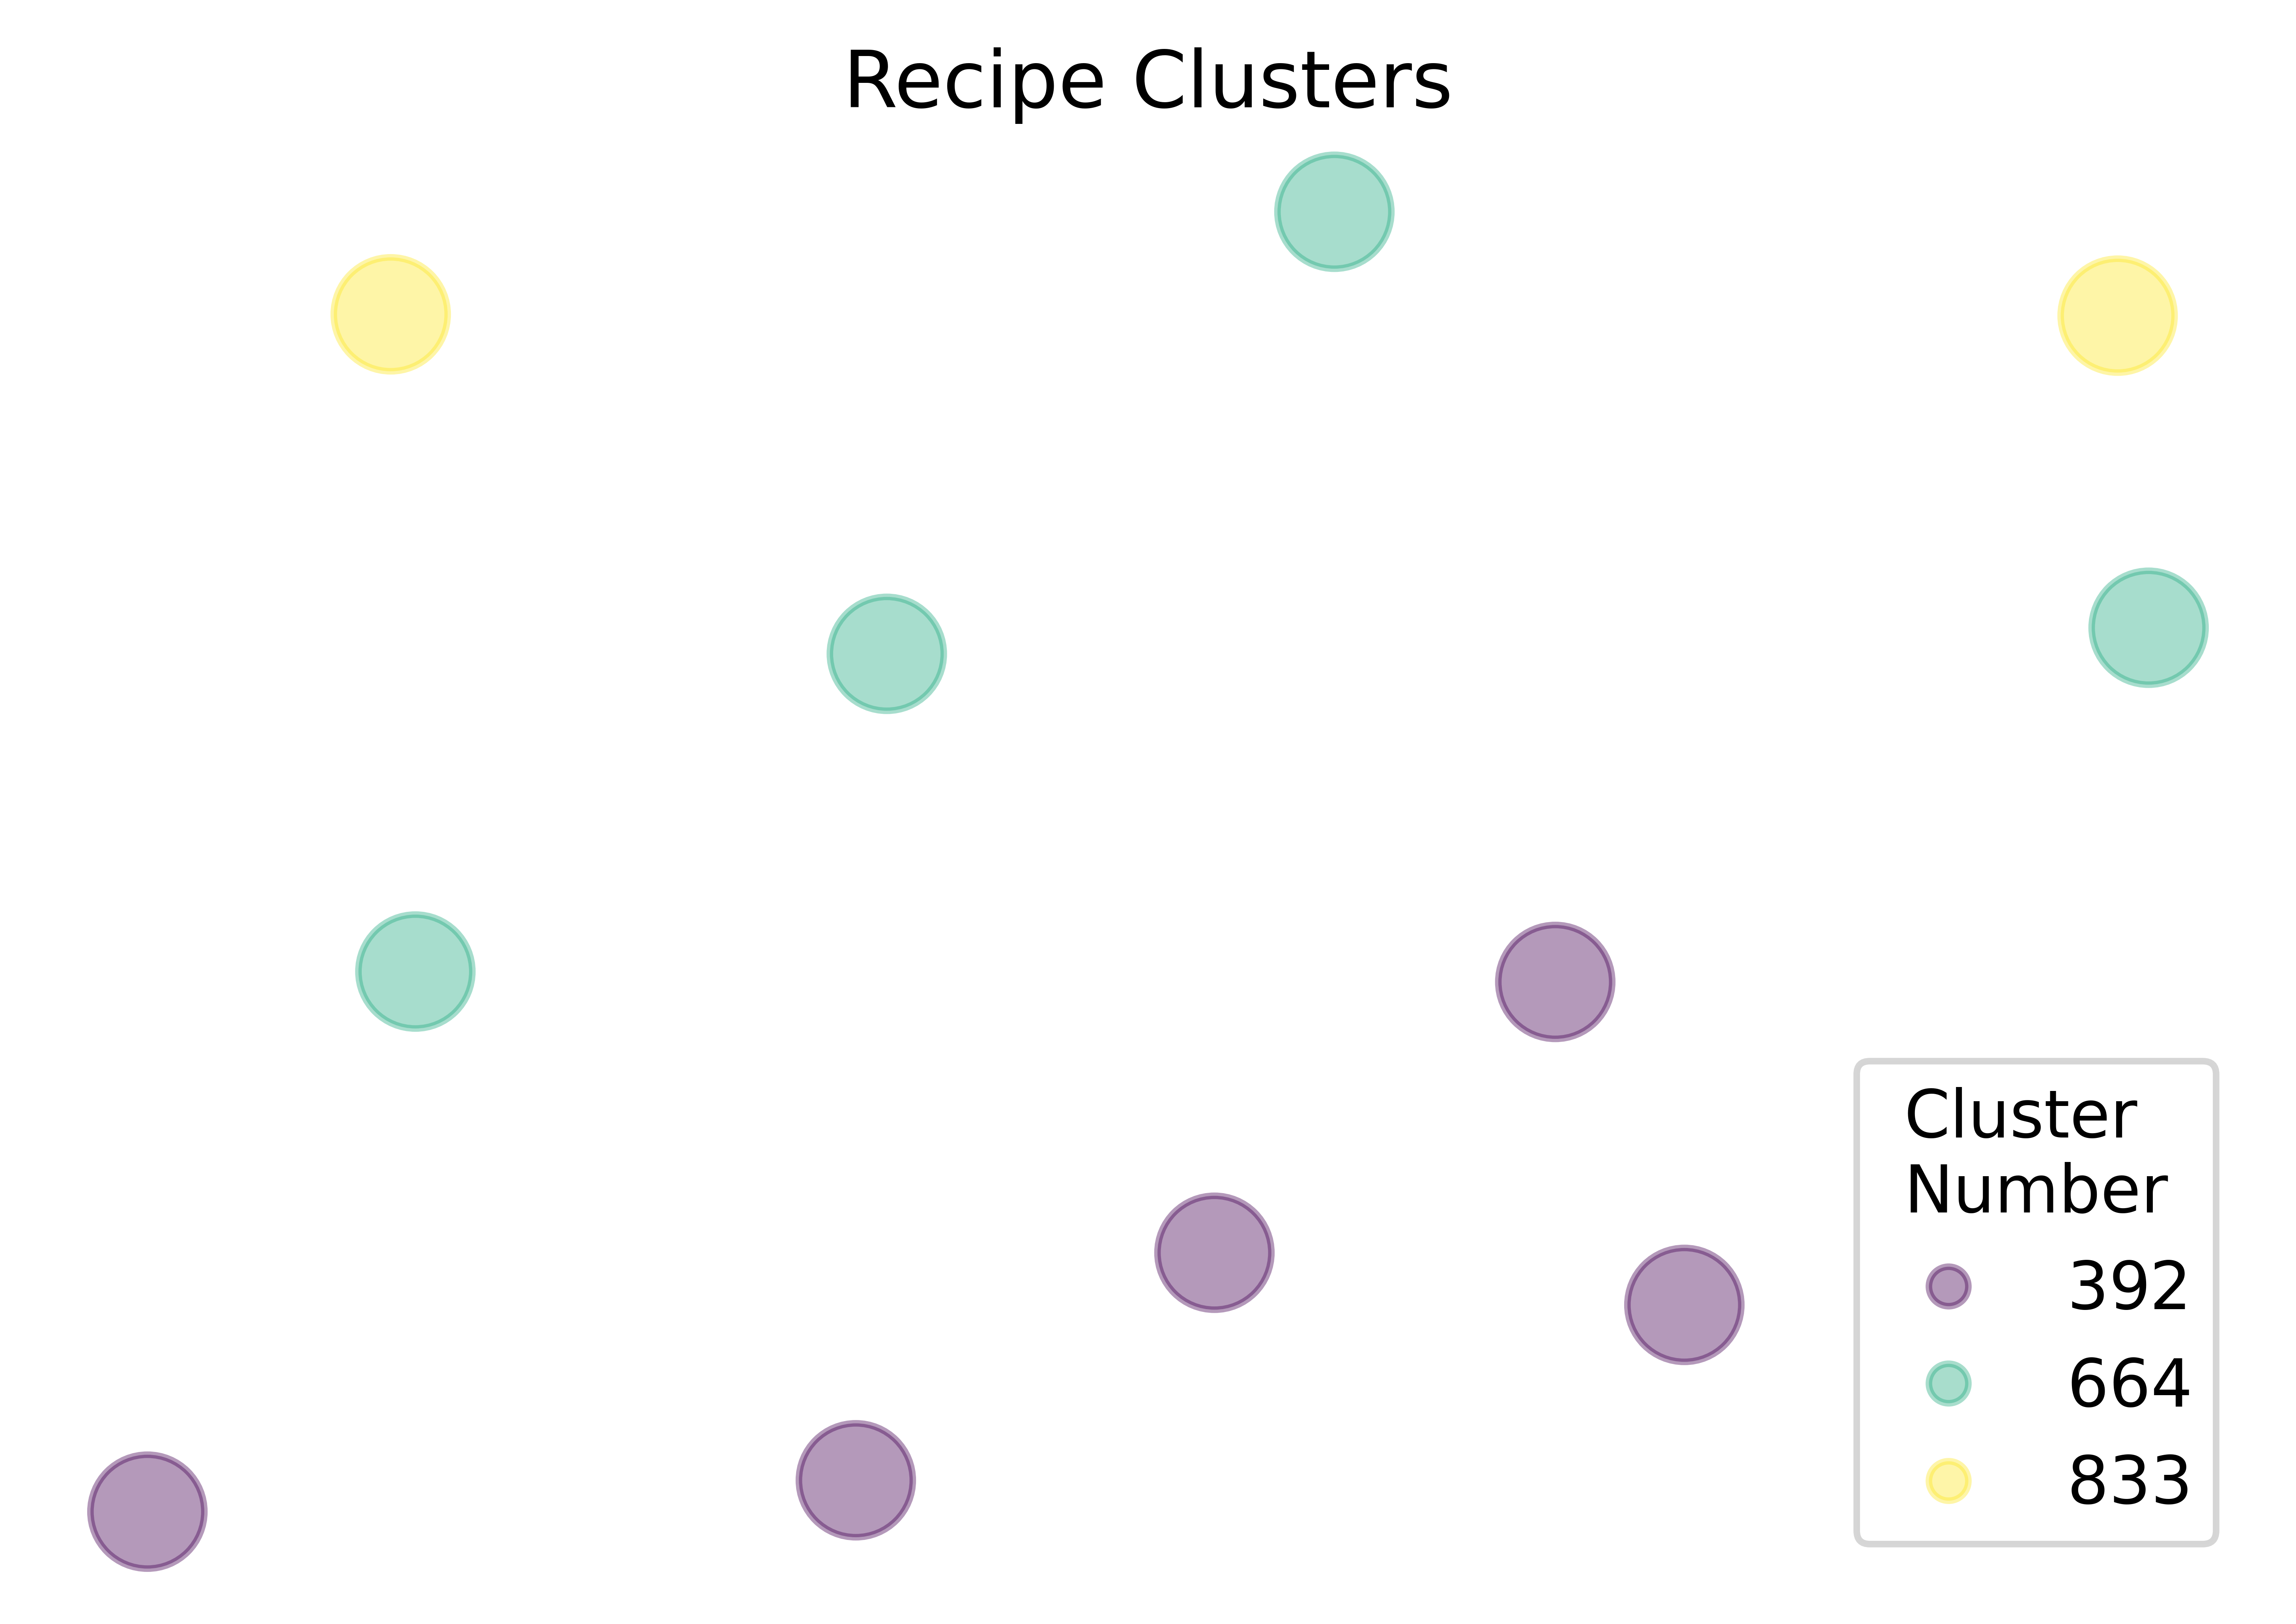

In [4]:

#get three random clusters
randomlist=[]
for i in range(0,3):
    n = random.randint(1,1000)
    randomlist.append(n)
    print(randomlist)

plt.figure(dpi=1200)
scatter = plt.scatter(recipes[recipes['aggcluster'].isin(randomlist)][0],
            recipes[recipes['aggcluster'].isin(randomlist)][1],
            c=recipes[recipes['aggcluster'].isin(randomlist)]['aggcluster'],alpha=.4,s=300)
plt.title('Recipe Clusters')
plt.legend(*scatter.legend_elements(),title='Cluster\nNumber')
plt.axis('Off')
plt.savefig('threeclusters')

#only shows when axis('On')
plt.grid(color='grey',alpha=0.3, linestyle=':', linewidth=1)
plt.show()

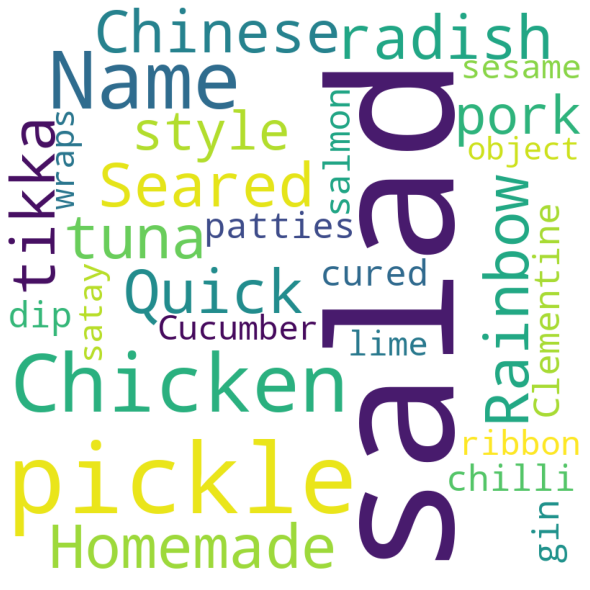

[833, 392, 664]


In [5]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

  
STOPWORDS.add('dtype')
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords=STOPWORDS,
                colormap='viridis',
                max_words=50,
                min_font_size = 10).generate(str(recipes[recipes['aggcluster']==41]['name']))
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('Off')
plt.tight_layout(pad = 0)
  
plt.show()
print(randomlist)


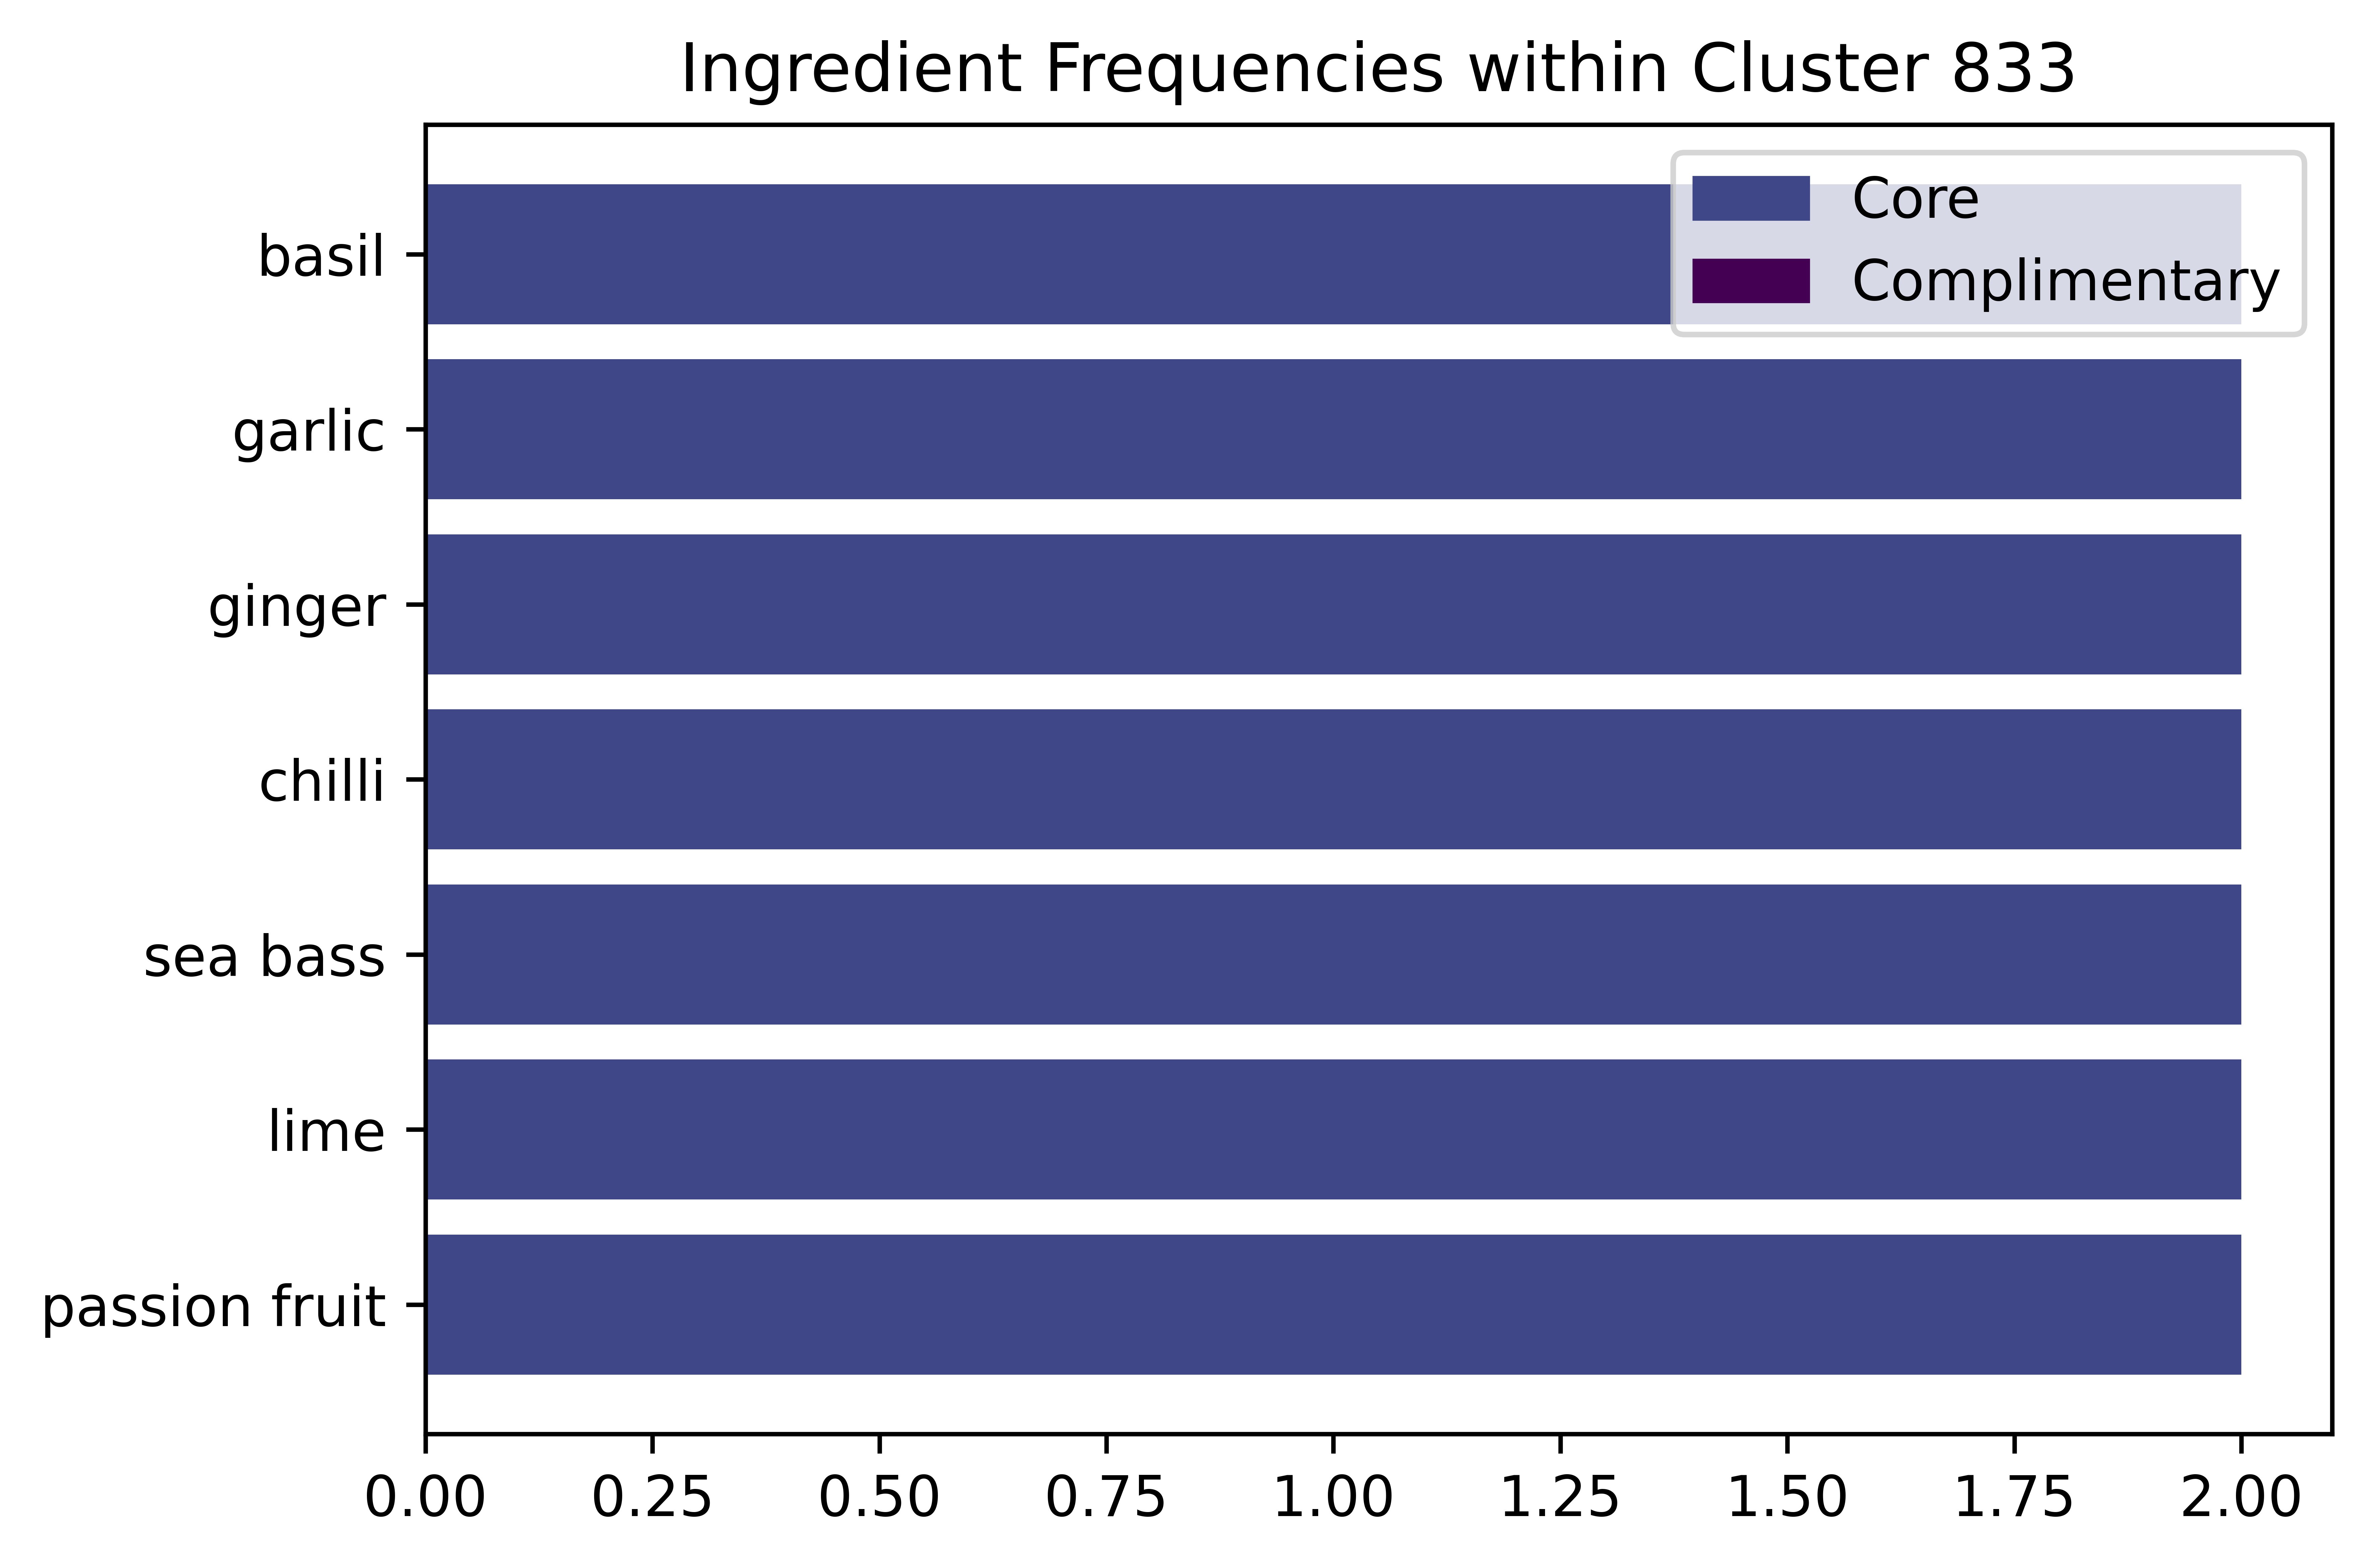

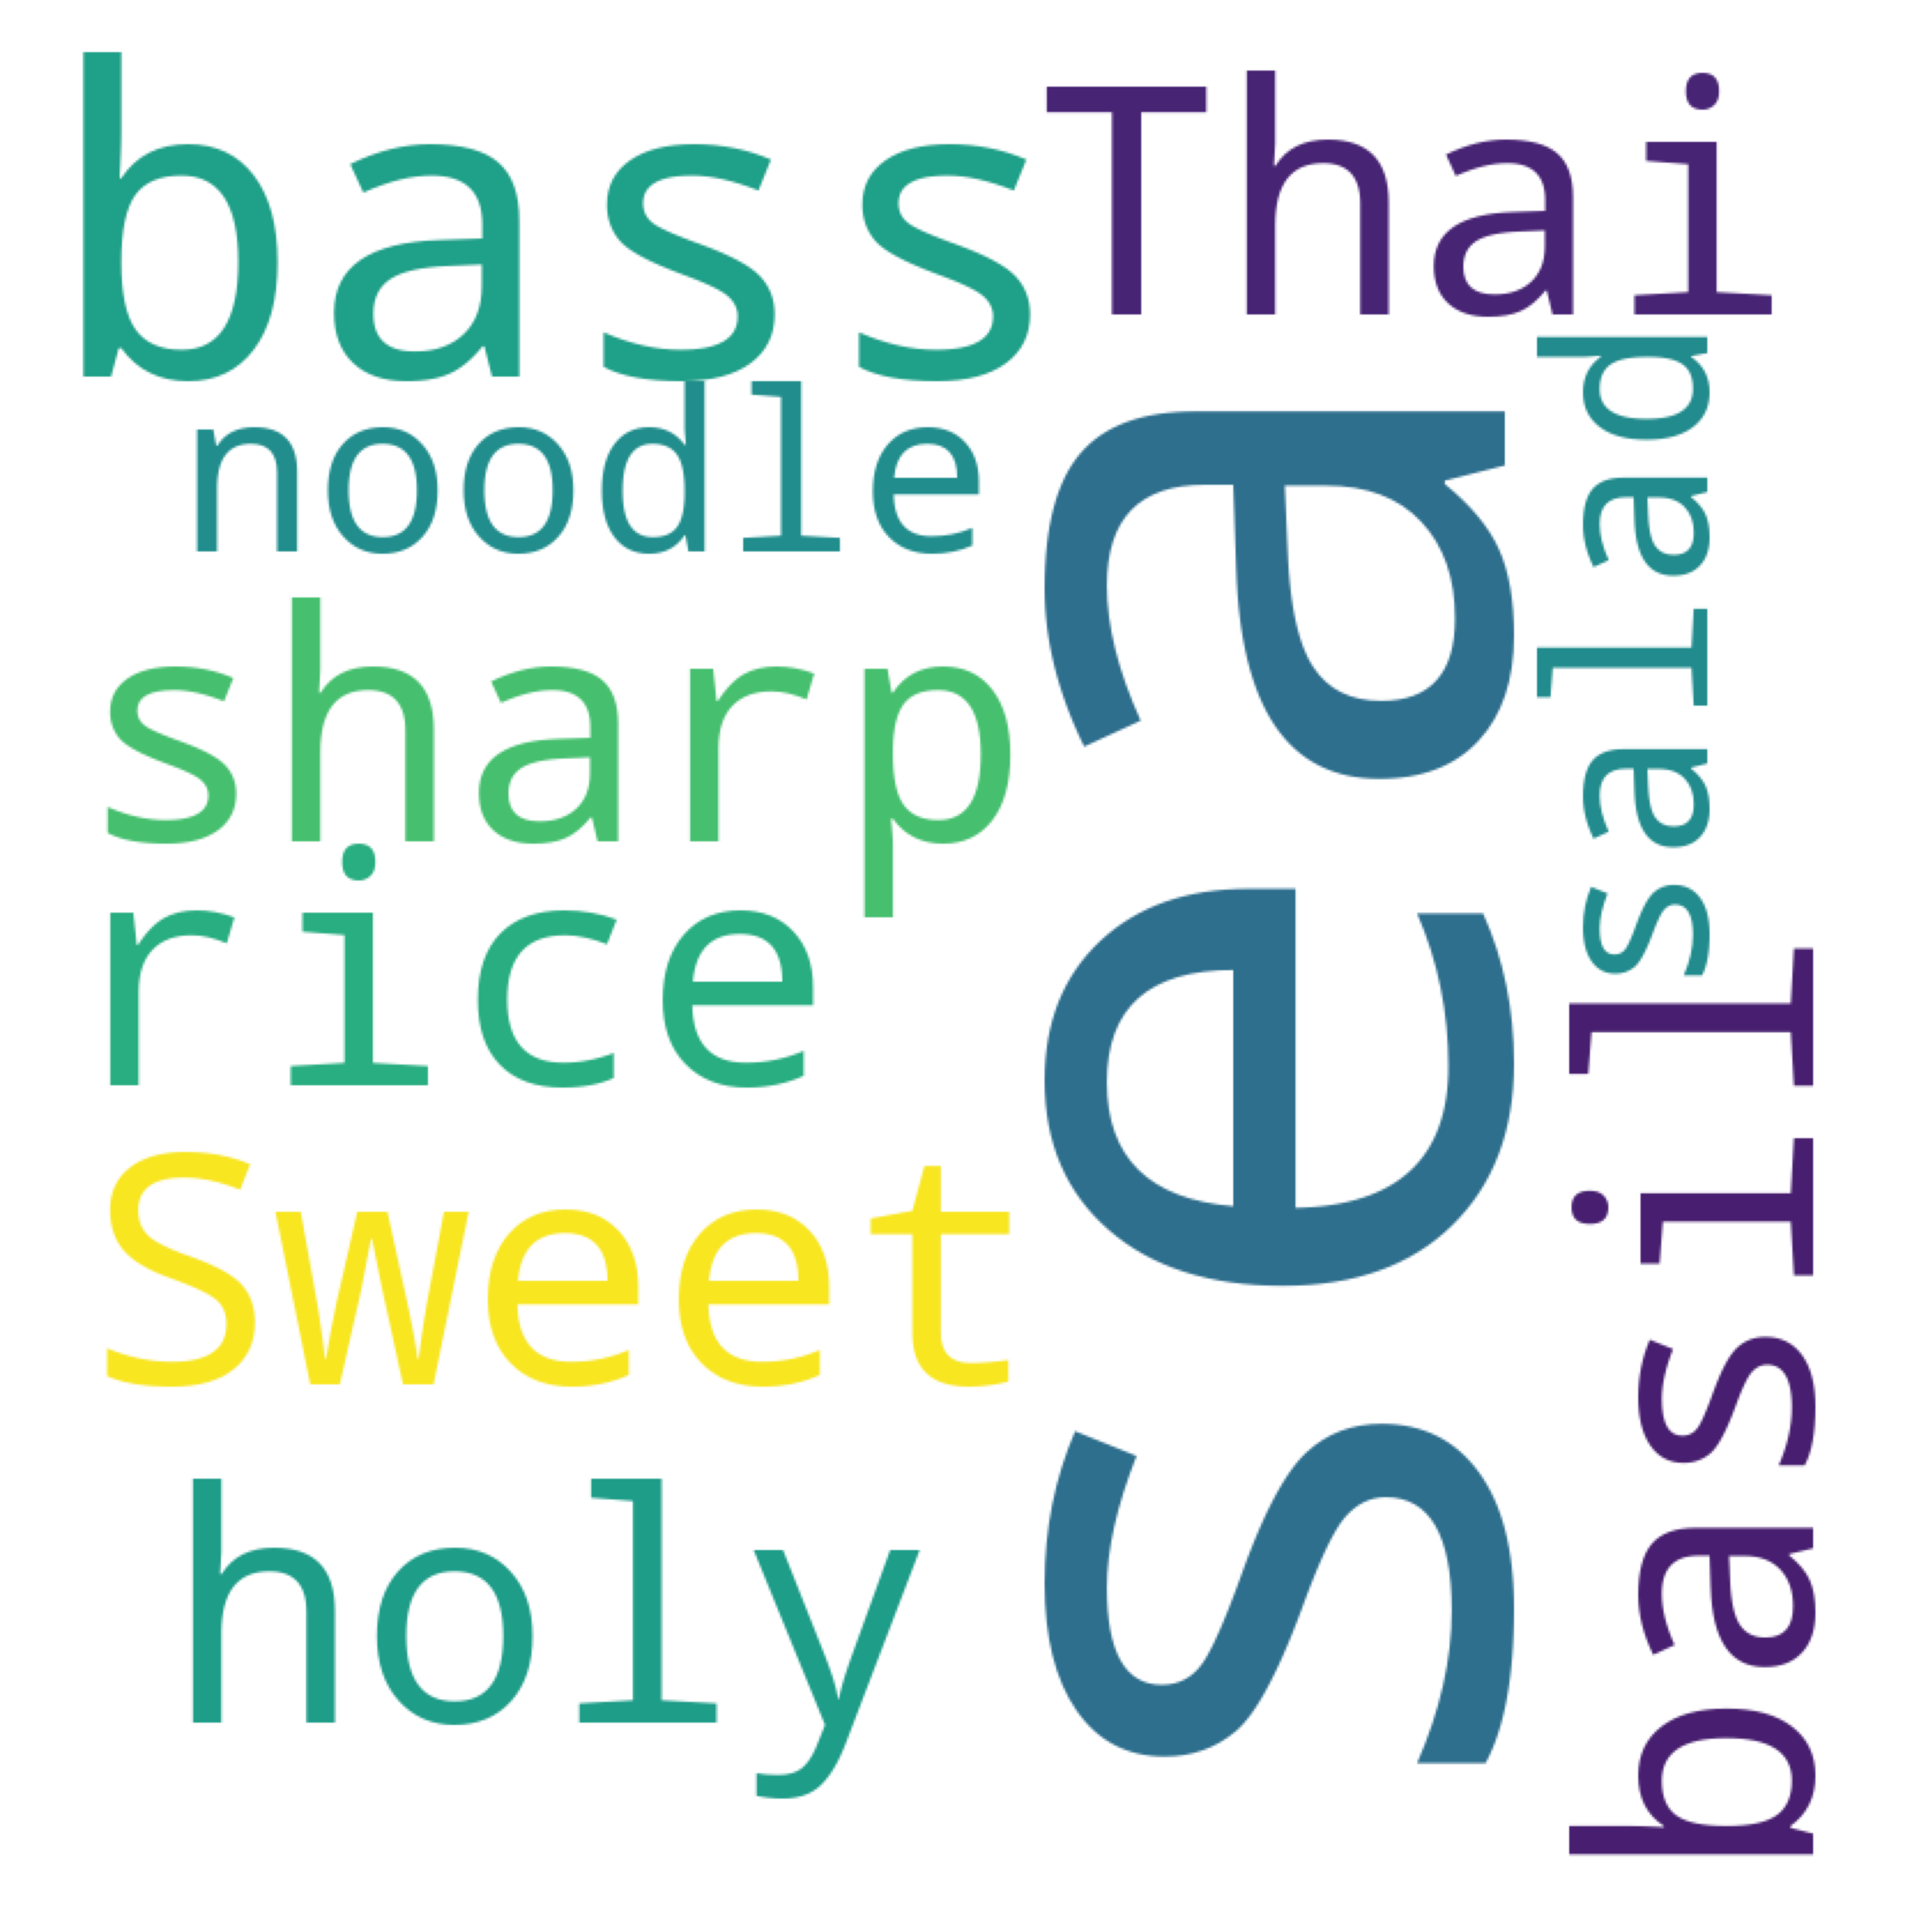

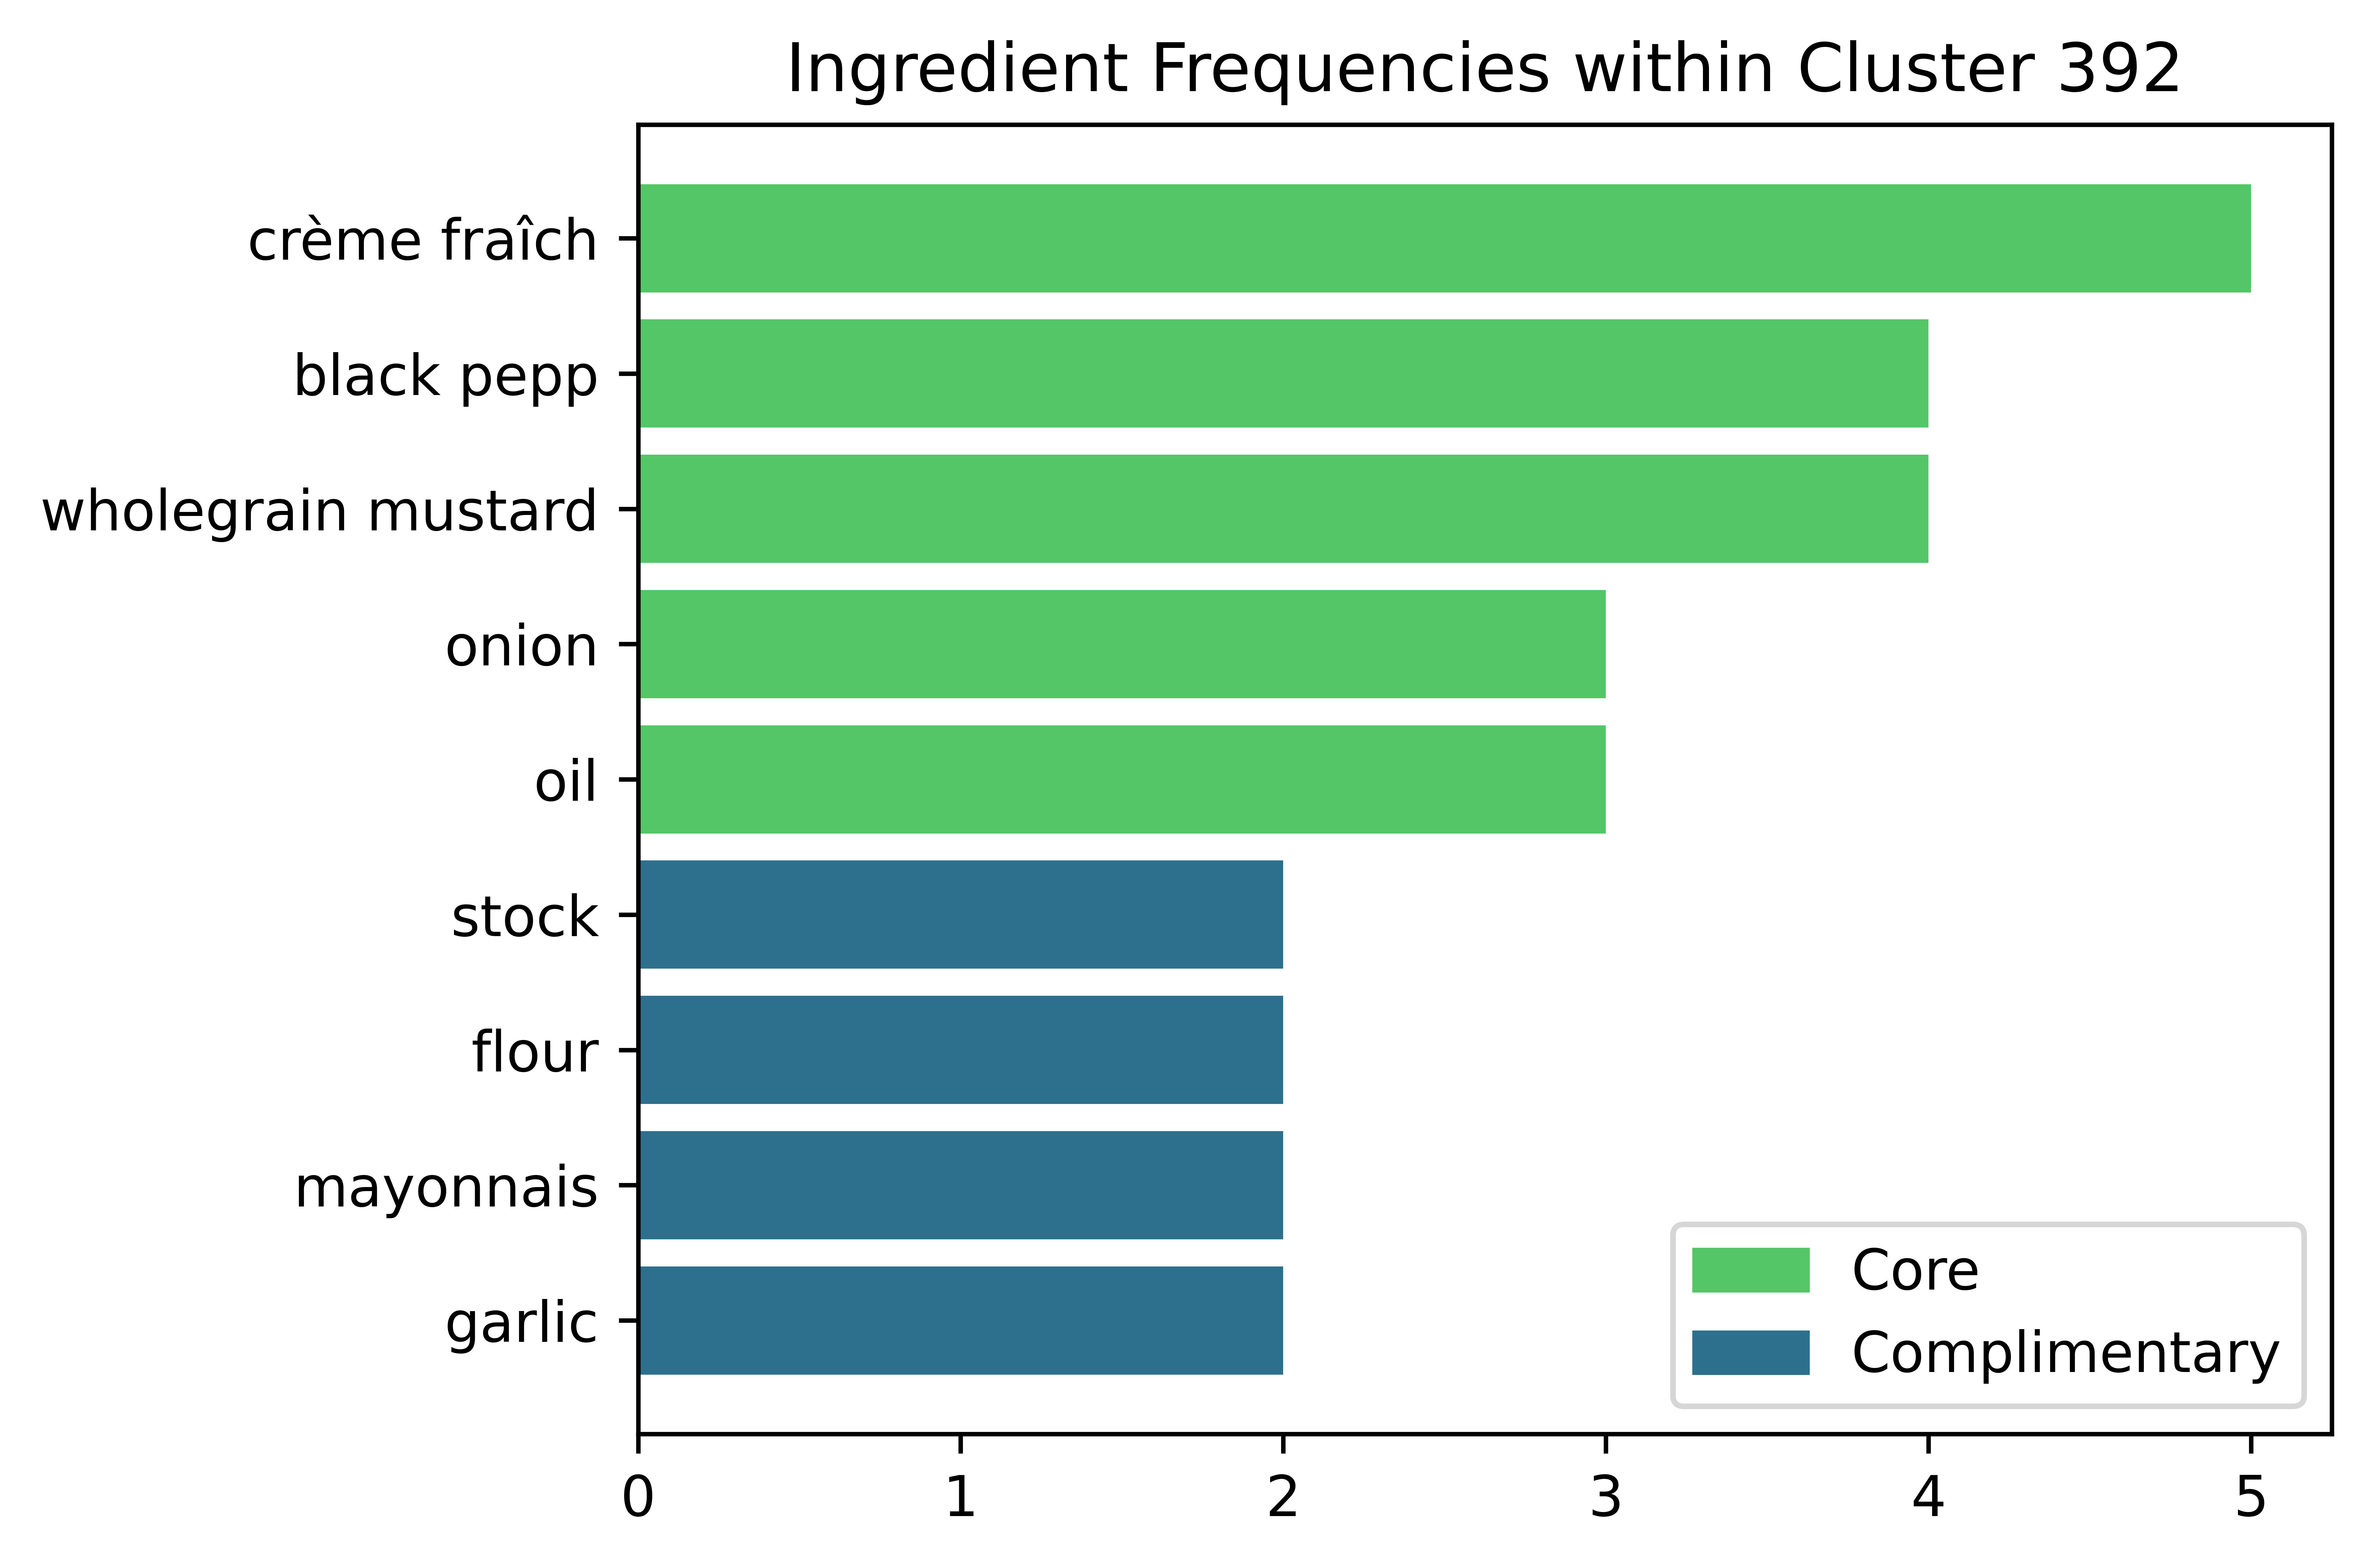

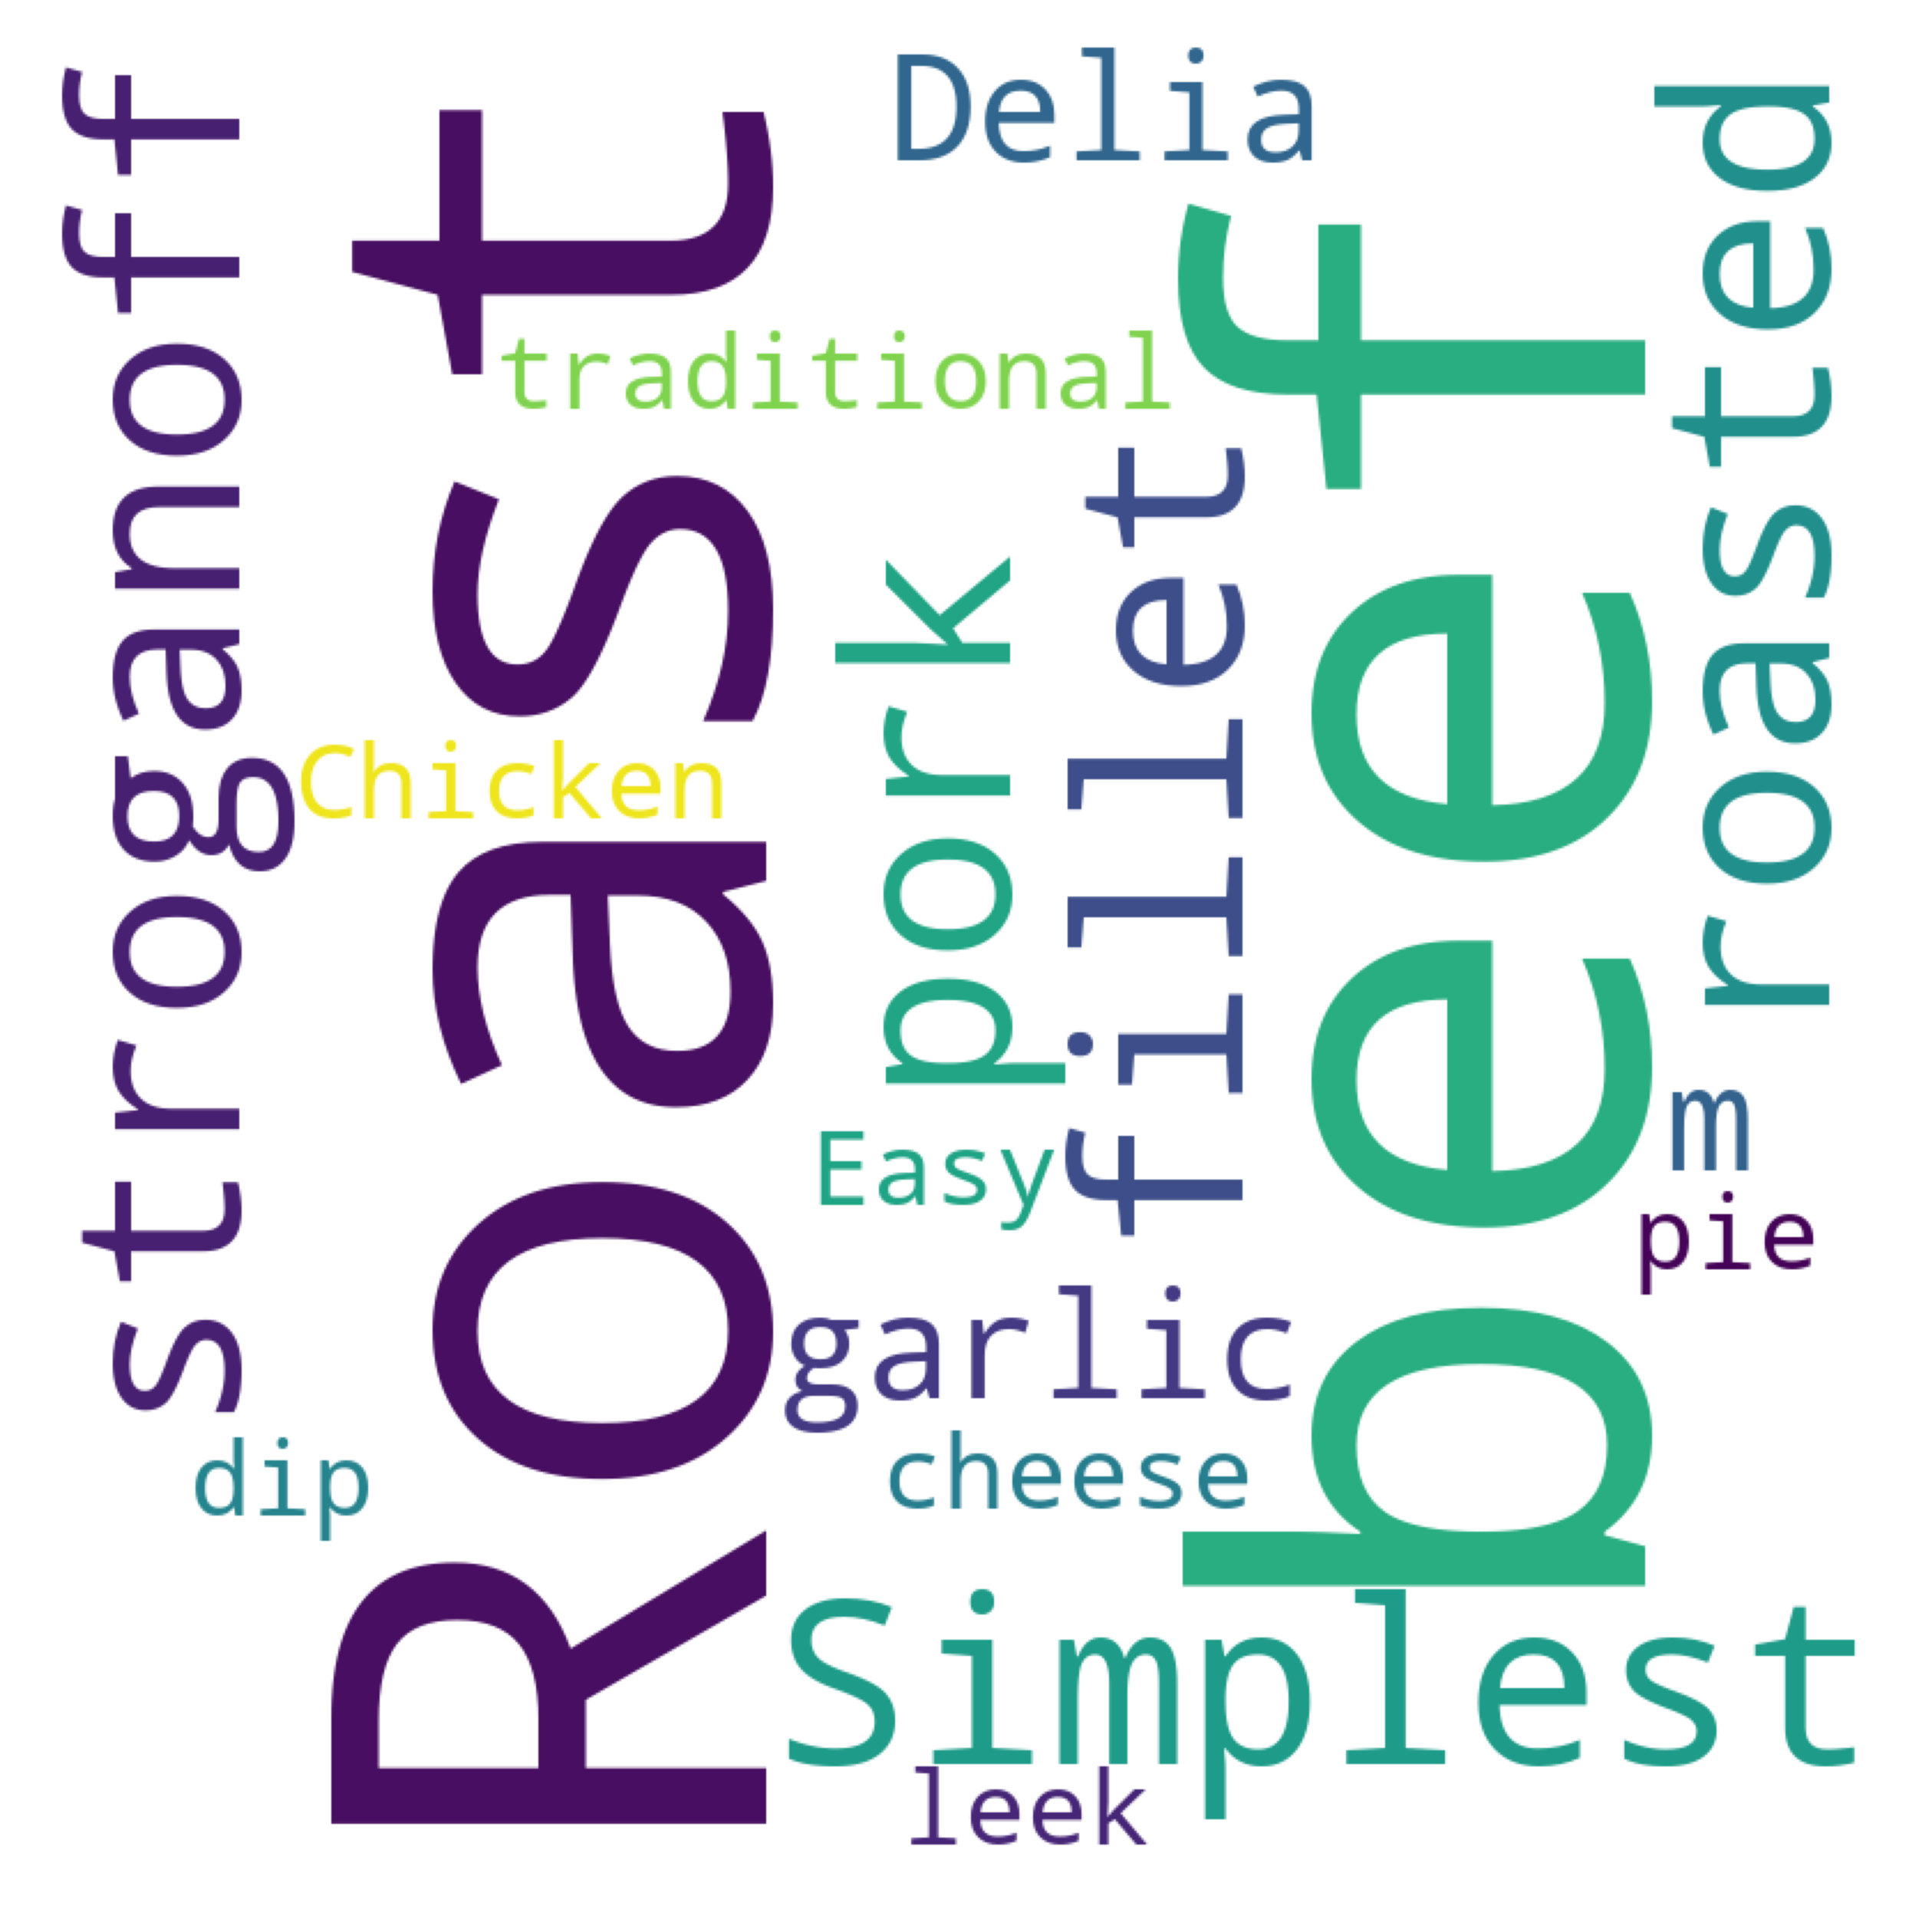

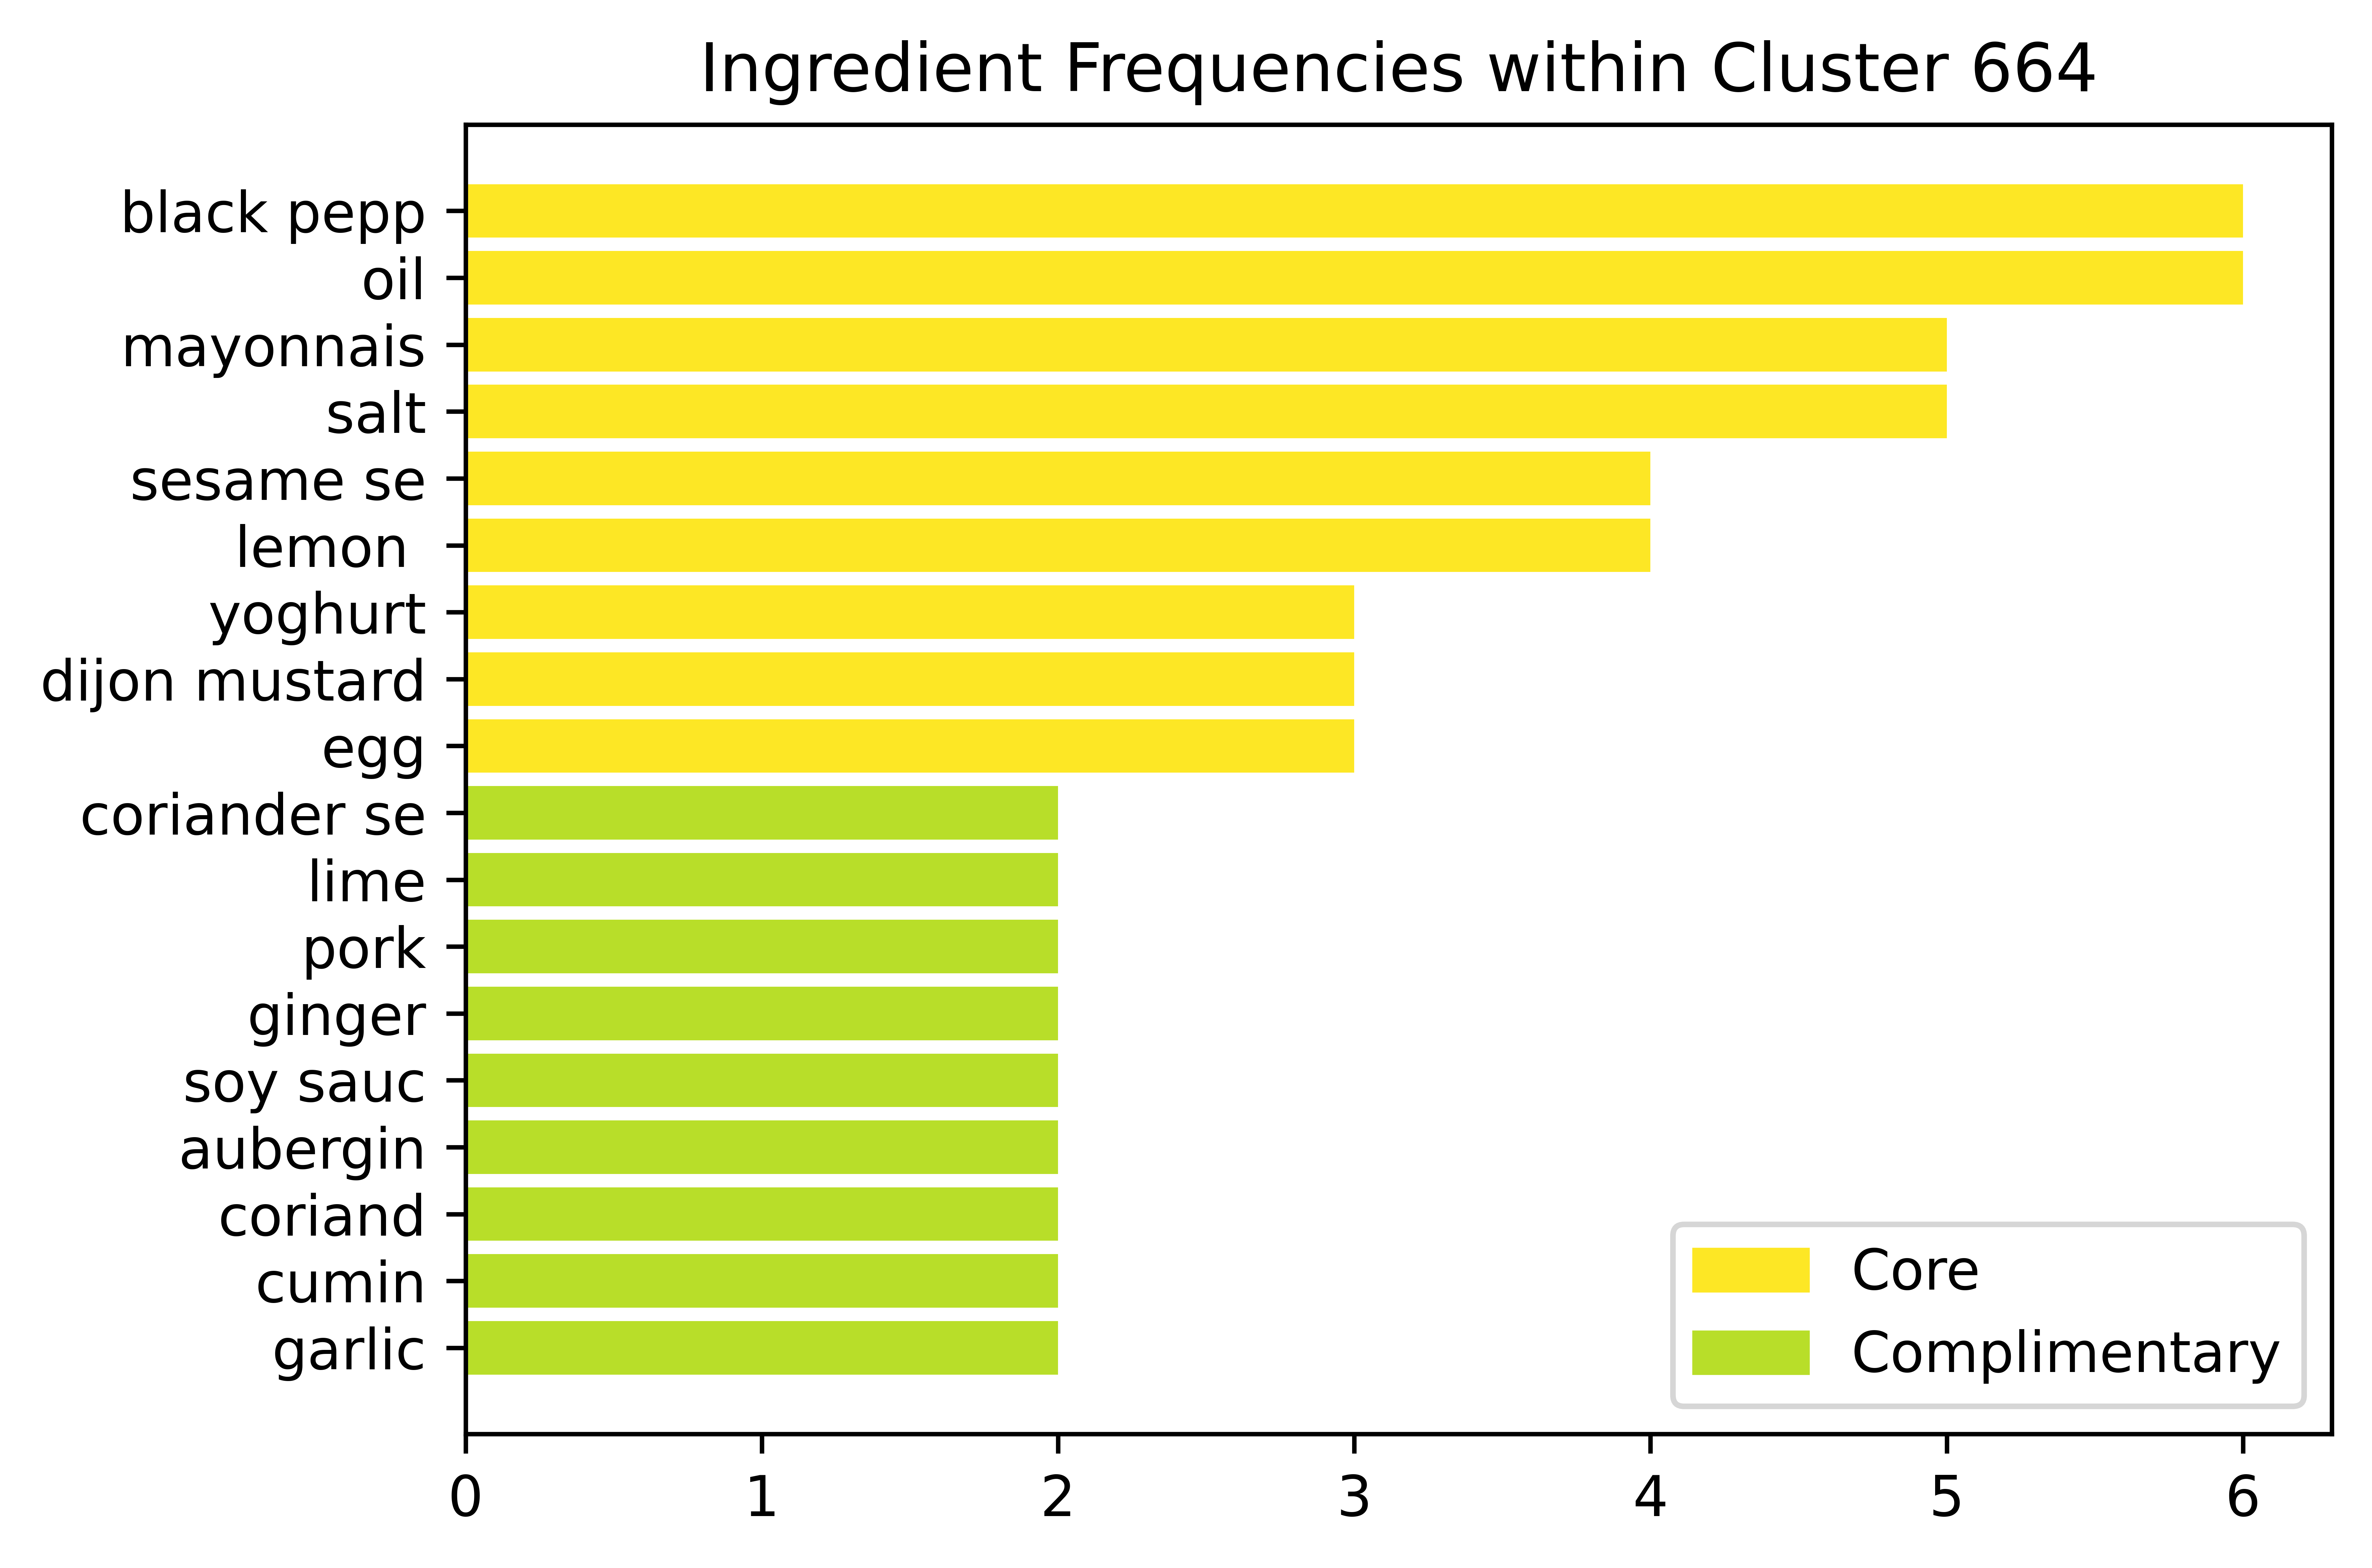

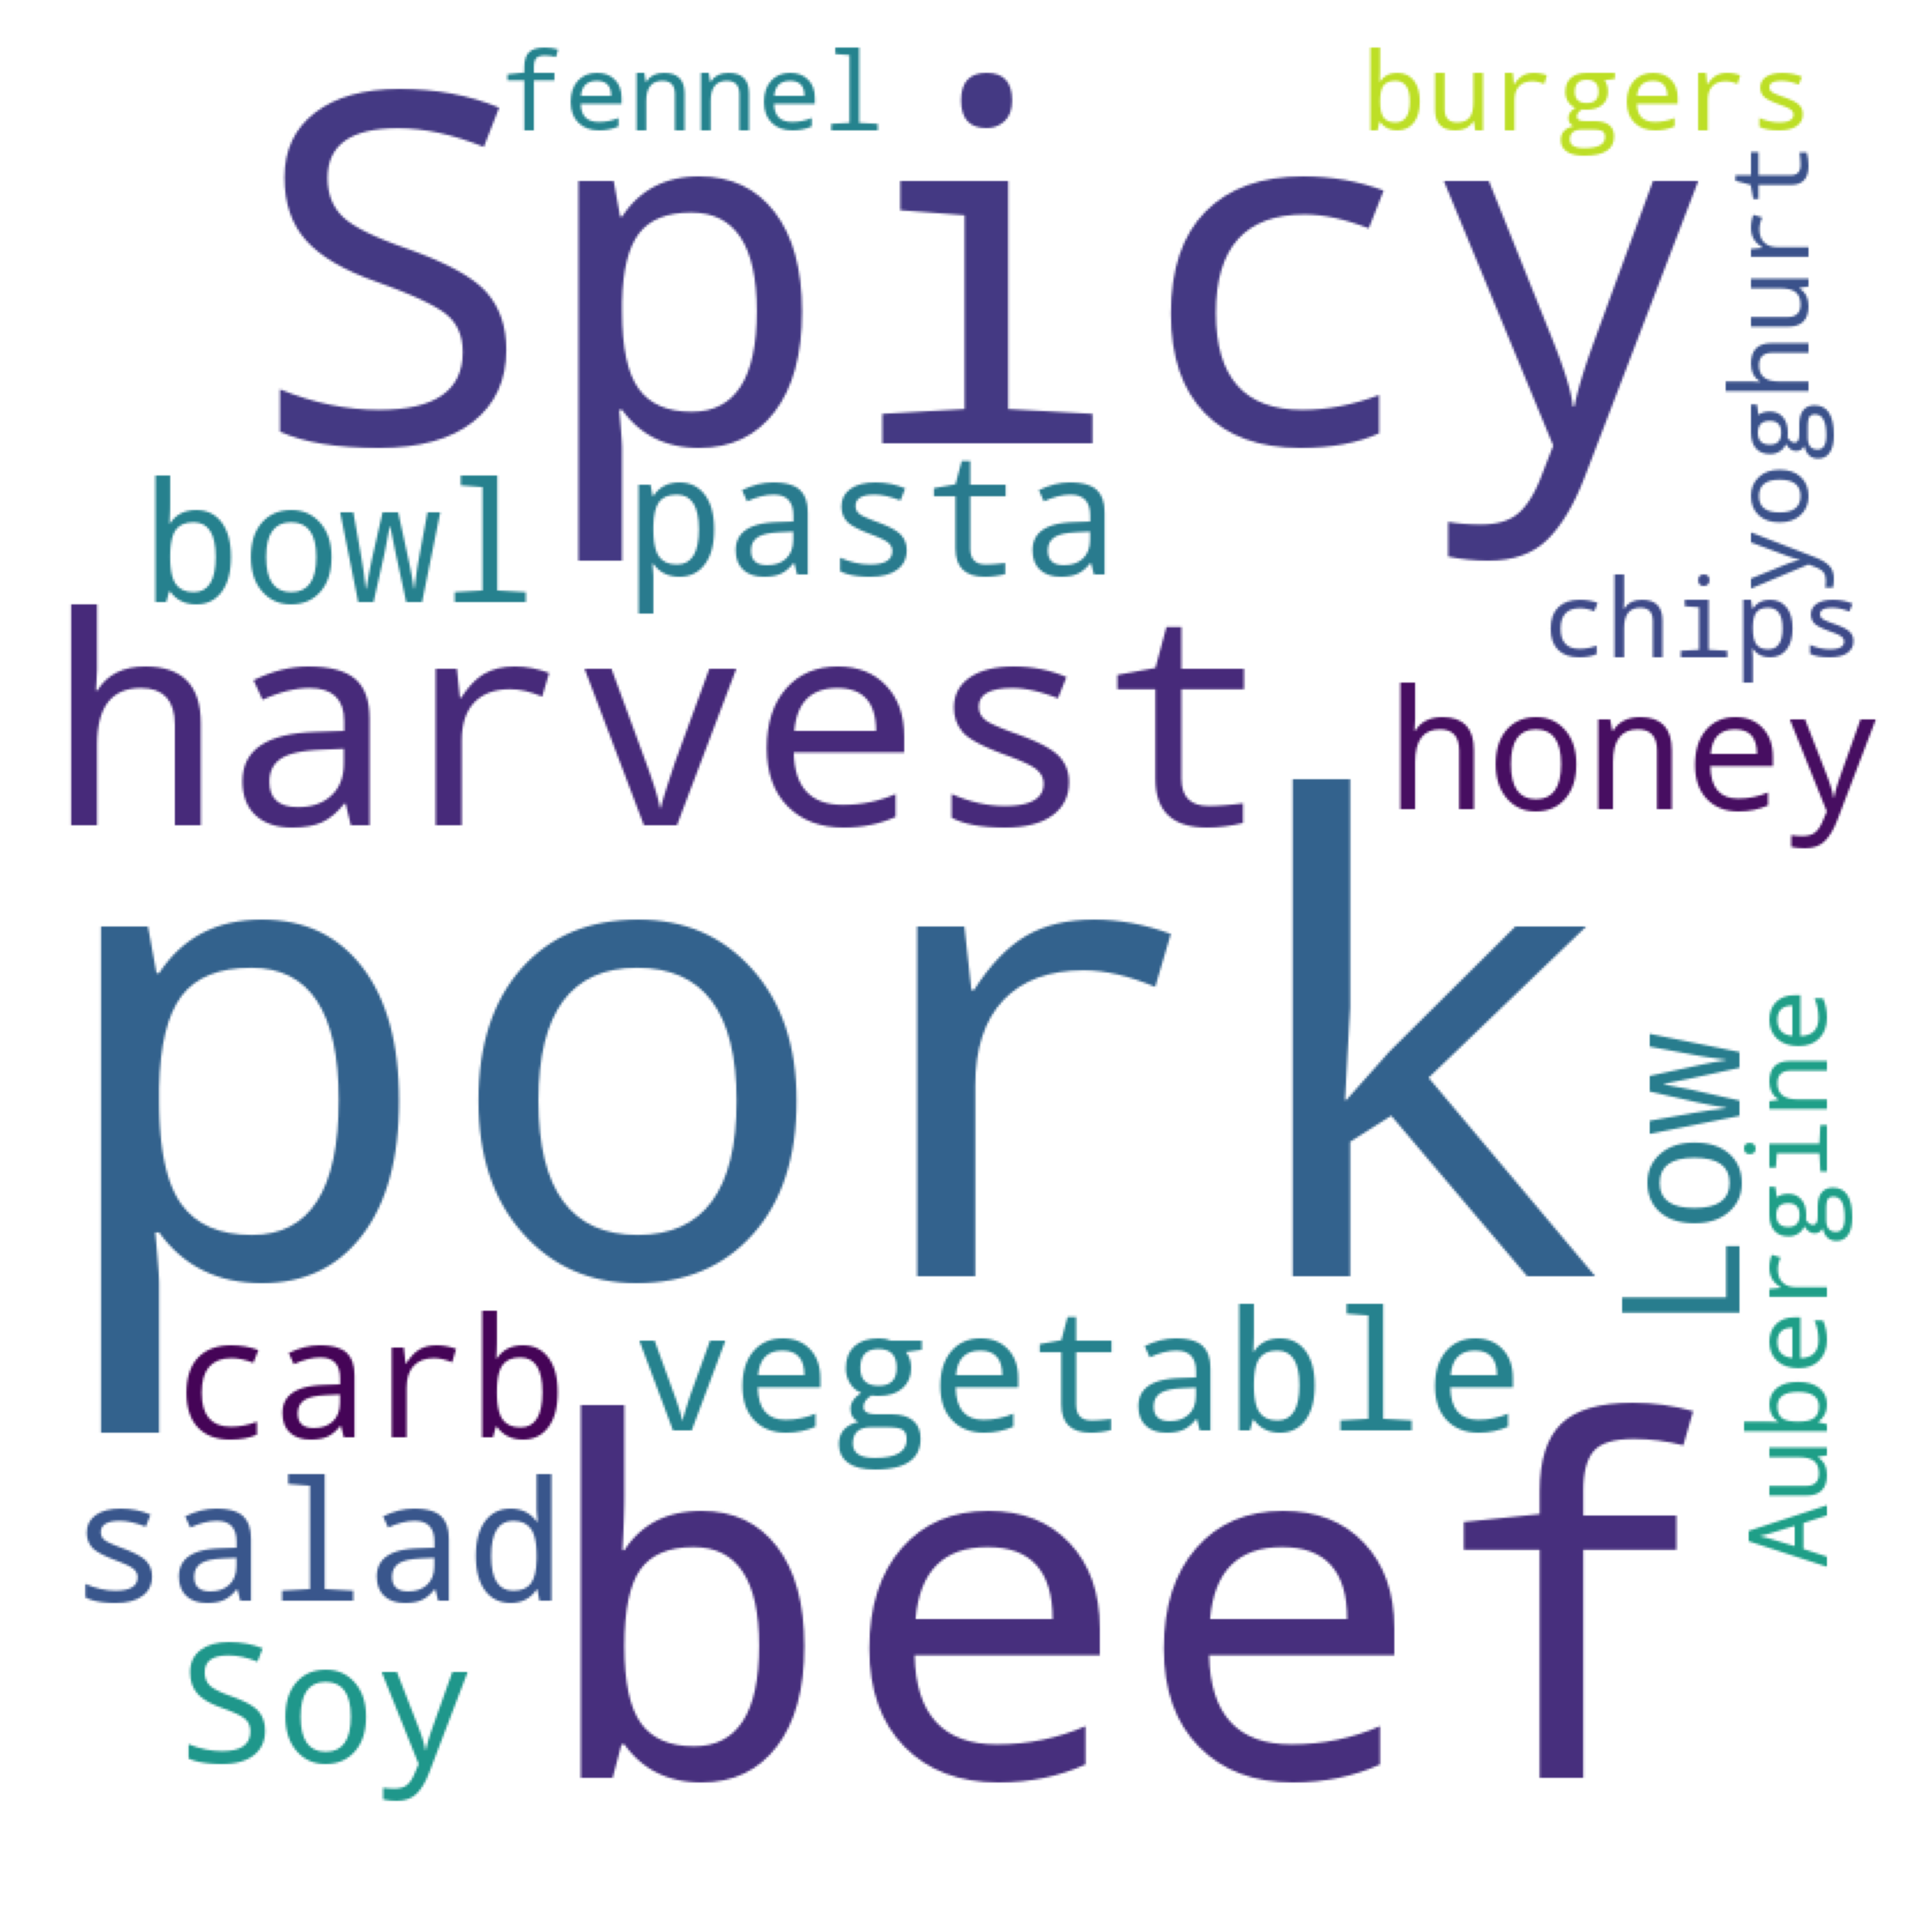

In [7]:
from wordcloud import WordCloud, STOPWORDS
def CountFrequency(my_list):
  
    # Creating an empty dictionary 
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1

    return freq


for j, num in enumerate(randomlist):
    ingredients = []
    color=[]
    #[619, 861, 960]
    single_cluster = num
    
    
    #pre-process for wordcloud and histograms
    for ingredientlist in recipes[recipes['aggcluster']==single_cluster]['all_ingredients']:
        for ingredient in ingredientlist:
            ingredients.append(ingredient)


    freq = CountFrequency(ingredients)

    freq_larger_one = {key: value for key, value in freq.items() if value > 1}
    freq_larger_one = dict(sorted(freq_larger_one.items(), key=lambda x: x[1], reverse=False))
    freq_larger_one_series = pd.Series(freq_larger_one)

    c = pd.Series(freq_larger_one_series>len(recipes[recipes['aggcluster']==single_cluster].index)//2)
    
    #give each histogram colors corresponding to clusters
    if j == 0:
        color1='#440154FF'
        color2='#404788FF'
        for i in c:
            if i==False:
                color.append('#440154FF')
            else:
                color.append('#404788FF')
    if j == 1:
        color1='#2D708EFF'
        color2='#55C667FF'
        for i in c:
            if i==False:
                color.append('#2D708EFF')
            else:
                color.append('#55C667FF')
    if j == 2:
        color1='#B8DE29FF'
        color2='#FDE725FF'
        for i in c:
            if i==False:
                color.append('#B8DE29FF')
            else:
                color.append('#FDE725FF')
    
    
    plt.figure(dpi=1200)
    plt.barh(list(freq_larger_one.keys()),list(freq_larger_one.values()),color=color)
    plt.title('Ingredient Frequencies within Cluster {}'.format(single_cluster))


    colors = {'Core':color2, 'Complimentary':color1}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels)
    plt.tight_layout()
    plt.savefig('nicehist_{}'.format(single_cluster))
    plt.show()


    #get wordcloud

    STOPWORDS.add('dtype')
    STOPWORDS.add('Name')
    STOPWORDS.add('object')
    

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords=STOPWORDS,
                    colormap='viridis',
                    max_words=50,
                    min_font_size = 10).generate(str(recipes[recipes['aggcluster']==single_cluster]['name']))

    # plot the WordCloud image                       
    plt.figure(facecolor = None,dpi=600)
    plt.imshow(wordcloud)
    plt.axis('Off')
    plt.tight_layout(pad = 0)

    plt.show()


In [8]:
pd.options.display.max_colwidth = 200

#get some insights in recipes insides cluster
for i in randomlist:
    print(recipes[recipes['aggcluster']==i][['name','all_ingredients']])


                                                 name  \
1170                         Sweet and sharp sea bass   
8907  Thai sea bass with holy basil rice noodle salad   

                                                                                                          all_ingredients  
1170                                  [passion fruit, lime, orang, vanilla pod, sea bass, chilli, chilli, chive, coriand]  
8907  [sea bass, peanut, ginger, garlic, basil, oil, lime, garlic, ginger, fish sauc, passion fruit, noodl, onion, basil]  
                                                            name  \
399                                Simplest-ever pork stroganoff   
1957  Roast fillet of beef with roasted garlic and mustard cream   
2329                             Delia's traditional roast beef    
2889                                             Easy cheese dip   
6904                                        Chicken and leek pie   

                                               